# Comparing LZ compression algorithms

## Introduction

In this notebook, we"ll compare different versions of the LZ compression algorithm—specifically, LZW, LZMA, LZ77, and LZ78—on a set of sample files.

## Prerequisites

The following libraries are used:

- `lzma` (built-in module)
- `zlib` (built-in module)
- `pandas`
- `matplotlib`
- `seaborn`

In [38]:
import os
from pathlib import Path
import time
import lzma
import zlib
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid")

In [39]:
sample_dir = Path("samples")
files = [f for f in sample_dir.iterdir() if f.is_file()]

def read_file_content(file_path: Path) -> bytes:
    return file_path.read_bytes()

In [40]:
# LZMA compression

def compress_lzma(data: bytes) -> bytes:
    return lzma.compress(data)

def decompress_lzma(data: bytes) -> bytes:
    return lzma.decompress(data)

In [41]:
# LZ77 compression

def compress_lz77(data: bytes) -> bytes:
    return zlib.compress(data)

def decompress_lz77(data: bytes) -> bytes:
    return zlib.decompress(data)

In [42]:
results = []

for file_path in files:
    data = read_file_content(file_path)
    original_size = len(data)
    file_name = file_path.name

    algorithms = [
        ("LZMA", compress_lzma),
        ("LZ77", compress_lz77),
    ]

    for algorithm_name, compress_func in algorithms:
        start_time = time.perf_counter()
        compressed_data = compress_func(data)
        compression_time = time.perf_counter() - start_time

        compressed_size = len(compressed_data)
        compression_ratio = compressed_size / original_size

        results.append({
            "file": file_name,
            "algorithm": algorithm_name,
            "original size (bytes)": original_size,
            "compressed size (bytes)": compressed_size,
            "compression ratio": compression_ratio,
            "compression time (seconds)": compression_time
        })

In [43]:
df = pd.DataFrame(results)
df

,file,algorithm,original size (bytes),compressed size (bytes),compression ratio,compression time (seconds)
0,random.txt,LZMA,100000,76252,0.76252,0.026891
1,random.txt,LZ77,100000,75185,0.75185,0.003804
2,alphabet.txt,LZMA,100000,176,0.00176,0.002380
3,alphabet.txt,LZ77,100000,290,0.00290,0.000348
4,aaa.txt,LZMA,100000,148,0.00148,0.001582
5,aaa.txt,LZ77,100000,121,0.00121,0.000272
6,a.txt,LZMA,1,60,60.00000,0.000707
7,a.txt,LZ77,1,9,9.00000,0.000007


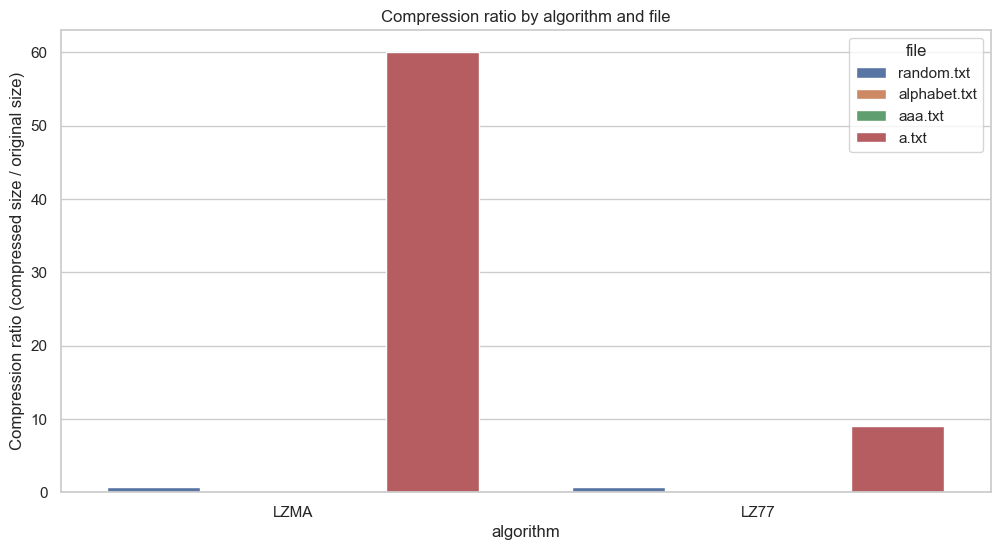

In [44]:
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x="algorithm", y="compression ratio", hue="file")
plt.title("Compression ratio by algorithm and file")
plt.ylabel("Compression ratio (compressed size / original size)")
plt.show()

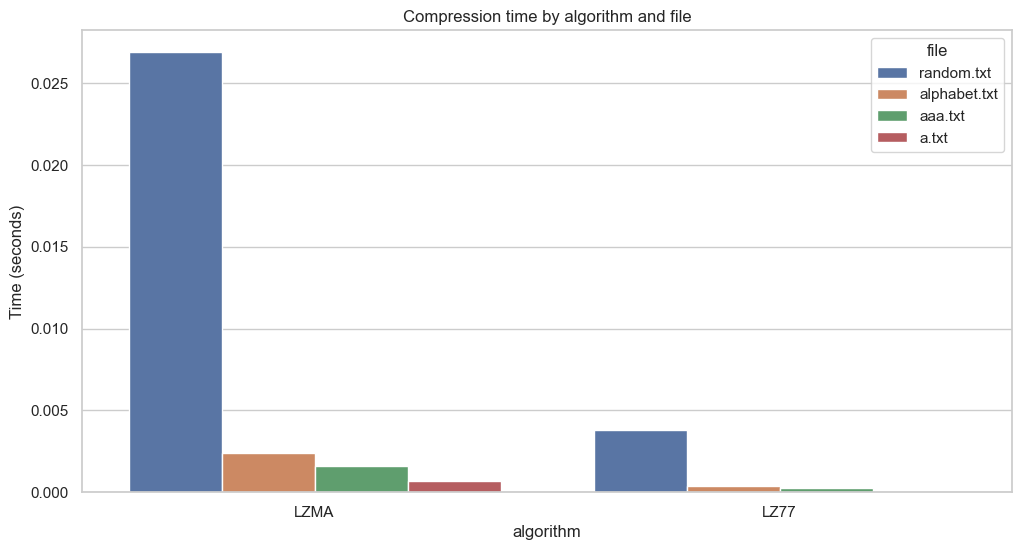

In [45]:
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x="algorithm", y="compression time (seconds)", hue="file")
plt.title("Compression time by algorithm and file")
plt.ylabel("Time (seconds)")
plt.show()

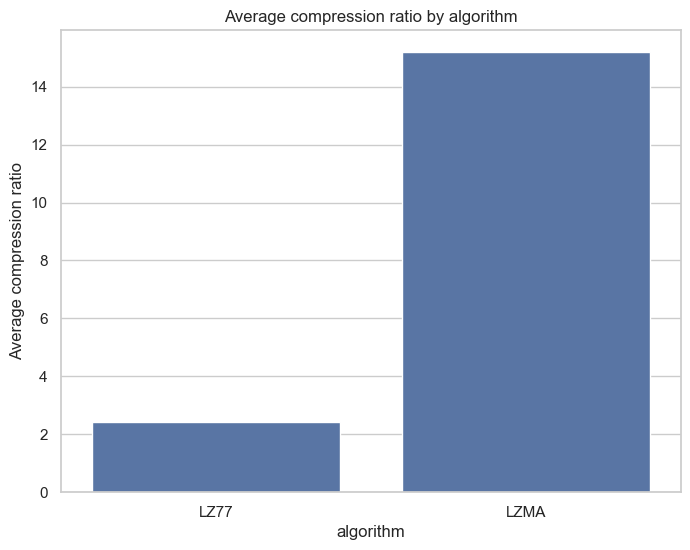

In [46]:
avg_ratio = df.groupby("algorithm")["compression ratio"].mean().reset_index()

plt.figure(figsize=(8, 6))
sns.barplot(data=avg_ratio, x="algorithm", y="compression ratio")
plt.title("Average compression ratio by algorithm")
plt.ylabel("Average compression ratio")
plt.show()

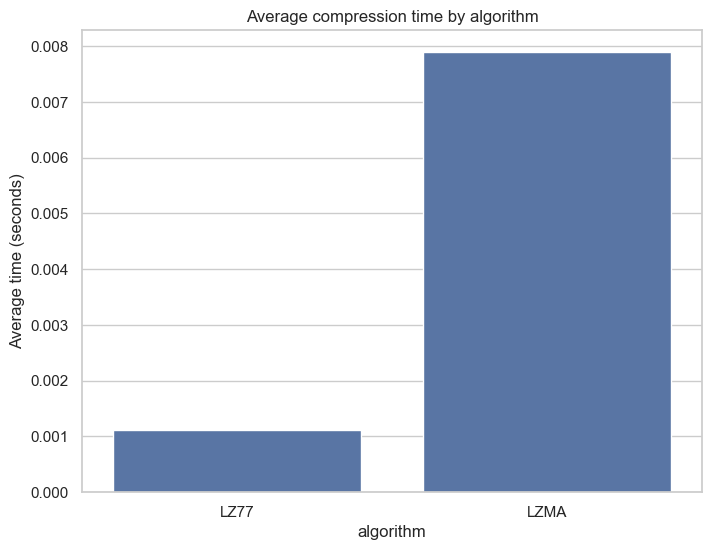

In [47]:
avg_time = df.groupby("algorithm")["compression time (seconds)"].mean().reset_index()

plt.figure(figsize=(8, 6))
sns.barplot(data=avg_time, x="algorithm", y="compression time (seconds)")
plt.title("Average compression time by algorithm")
plt.ylabel("Average time (seconds)")
plt.show()